# Summaries and Groups

The introduction focused largely on picking the data you wanted with `filter` and `select`; and reorganizing it with `gather` or `arrange`. In this notebook the focus is on analyzing the data. It's rarely the case that one can just plot the results from the data with no analysis.

## Summarize

Let's analyze the famous `iris`-dataset containing data on flowers.

In [99]:
library(tidyverse)

data(iris)

iris_tbl <- as_tibble(iris)

print(iris_tbl)

# A tibble: 150 x 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows


Let's say we want to analyze statistics e.g. mean, variance and correlation of petal widths/lengths. This means that we want to summarize rows (observations) into a single row with these mean values.

To do this we `summarize` (or `summarise`) rows with functions that takes columns (variables) as their input ([[summarize]](http://dplyr.tidyverse.org/reference/summarise.html)).

In [100]:
iris_tbl %>%
    summarize(
        Petal.Length_mean=mean(Petal.Length),
        Petal.Width_mean=mean(Petal.Width),
        Petal.Length_var=var(Petal.Length),
        Petal.Width_var=var(Petal.Width),
        Petal_cor=cor(Petal.Length,Petal.Width)
    )


Petal.Length_mean,Petal.Width_mean,Petal.Length_var,Petal.Width_var,Petal_cor
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.758,1.199333,3.116278,0.5810063,0.9628654


For multiple variables/functions it is good to use `summarize_at` or `summarize_all` ([[summarize_at]](http://dplyr.tidyverse.org/reference/summarise_all.html)).

Here `vars` selects variables, `contains` looks for substring from variable name and `funs` creates a list of function calls ([[vars]](http://dplyr.tidyverse.org/reference/vars.html), [[funs]](http://dplyr.tidyverse.org/reference/funs.html)).

These do not work for functions that take multiple columns (like `cor`). For them other functions need to be used.

In [105]:
iris_tbl %>%
    summarize_at(vars(contains('Petal')),funs(mean,var))

iris_tbl %>%
    select(-Species) %>%
    summarize_all(list(mean=mean, var=var))

Petal.Length_mean,Petal.Width_mean,Petal.Length_var,Petal.Width_var
<dbl>,<dbl>,<dbl>,<dbl>
3.758,1.199333,3.116278,0.5810063


Sepal.Length_mean,Sepal.Width_mean,Petal.Length_mean,Petal.Width_mean,Sepal.Length_var,Sepal.Width_var,Petal.Length_var,Petal.Width_var
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.843333,3.057333,3.758,1.199333,0.6856935,0.1899794,3.116278,0.5810063


One can also use oneliner functions with `.` used to mark the operated measurement. This can be useful with e.g. unit conversions.

The following would mutate all numerical values from centimeters to inches [[mutate_if]](http://dplyr.tidyverse.org/reference/summarise_all.html).

In [110]:
iris_tbl %>%
    mutate_if(is.numeric,funs(. / 2.54)) %>%
    head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2.007874,1.377953,0.5511811,0.07874016,setosa
1.929134,1.181102,0.5511811,0.07874016,setosa
1.850394,1.259843,0.5118110,0.07874016,setosa
1.811024,1.220472,0.5905512,0.07874016,setosa
1.968504,1.417323,0.5511811,0.07874016,setosa
2.125984,1.535433,0.6692913,0.15748031,setosa


We can easily visualize the correlation of petal width/height with `ggplot` and `geom_smooth` ([[geom_smooth]](http://ggplot2.tidyverse.org/reference/geom_smooth.html)).

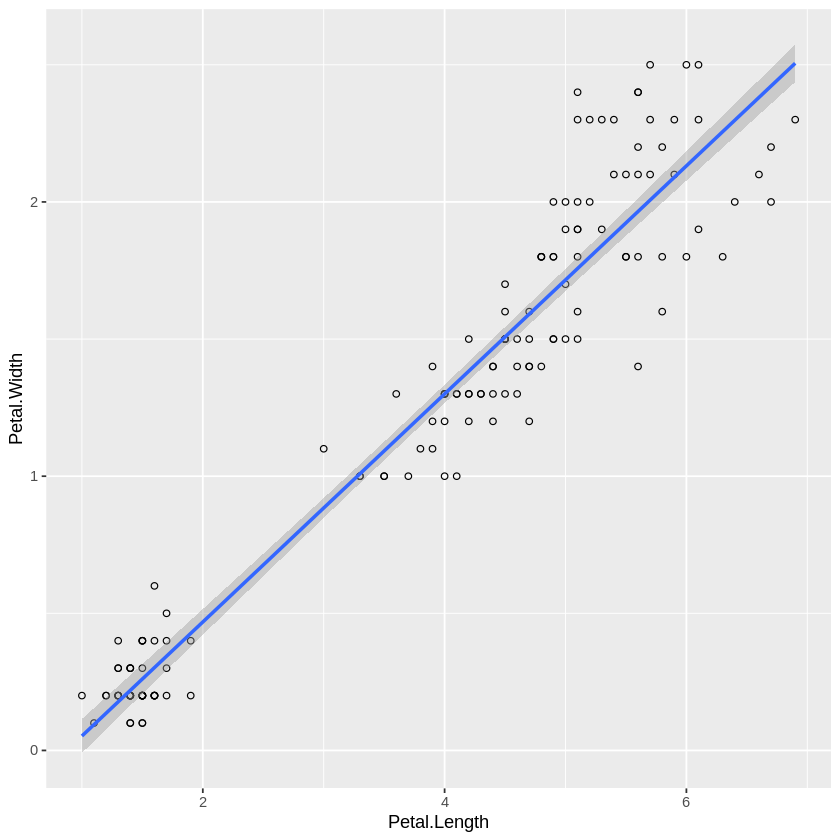

In [111]:
iris_tbl %>%
    ggplot(aes(x=Petal.Length,y=Petal.Width)) +
    geom_point(shape=1) +
    geom_smooth(method=lm)

## Groups

From the previous plot it is easy to see that the data is divided into clusters based on some unknown variable. For this reason we should try to group our analysis based on the same criterion.

Let's try Species as it seems like natural category to use for grouping. Grouping can be done with `group_by` ([[group_by]](http://dplyr.tidyverse.org/reference/group_by.html)).

In [112]:
iris_by_species <- iris_tbl %>%
    group_by(Species)
print(iris_by_species)

# A tibble: 150 x 5
# Groups:   Species [3]
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows


Do note that we have assigned this grouped Tibble into a new variable with `<-` as we do not want to do the grouping each time we run some analysis on the dataset.

In R objects are immutable, which means that function calls do not modify arguments. Thus only way of storing modifications made by functions is to assign the modified object into a variable.

Now let's run the same analysis and plotting that we did before on this dataset:

Species,Petal.Length_mean,Petal.Width_mean,Petal.Length_var,Petal.Width_var,Petal_cor
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,1.462,0.246,0.03015918,0.01110612,0.3316300
versicolor,4.260,1.326,0.22081633,0.03910612,0.7866681
virginica,5.552,2.026,0.30458776,0.07543265,0.3221082


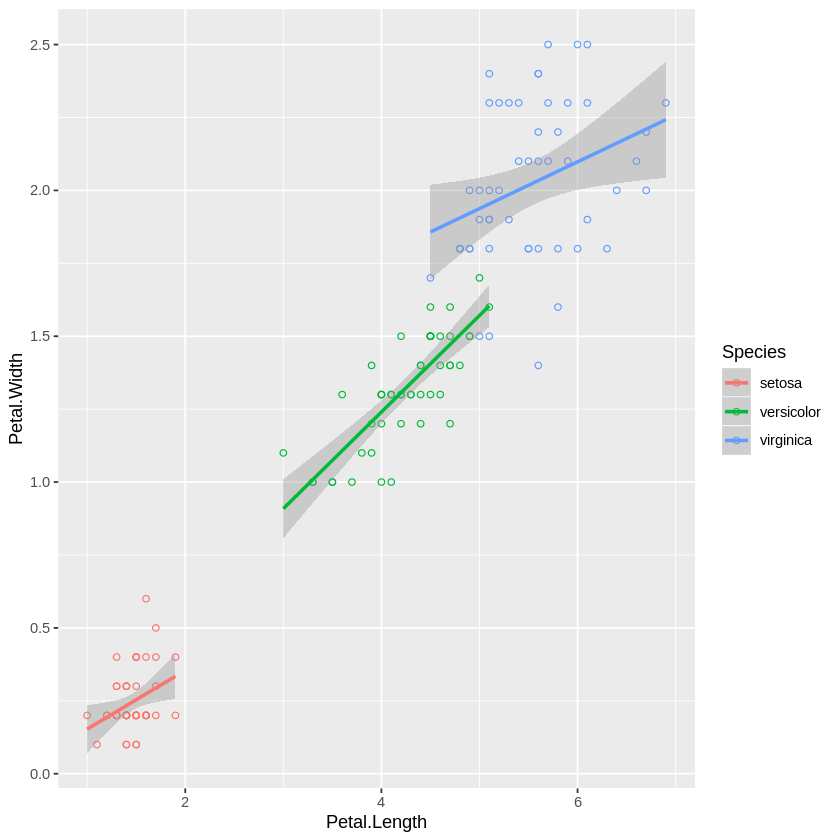

In [113]:
iris_by_species %>%
    summarize(
        Petal.Length_mean=mean(Petal.Length),
        Petal.Width_mean=mean(Petal.Width),
        Petal.Length_var=var(Petal.Length),
        Petal.Width_var=var(Petal.Width),
        Petal_cor=cor(Petal.Length,Petal.Width)
    )

iris_by_species %>%
    ggplot(aes(x=Petal.Length,y=Petal.Width,color=Species)) +
    geom_point(shape=1) +
    geom_smooth(method=lm)

By specifying `color=Species` we get three subplots that clearly visualize the three families of flowers. 

# Exercise time:

Do these exercises to `mtcars`-dataset intialized below (do note the use of `rownames_to_column` that will store row names from `data.frame` into a column in `tibble` [[rownames_to_column]](https://tibble.tidyverse.org/reference/rownames.html)):

1. Use `mutate` to calculate litres per 100 km (e.g. lp100km) as mpg is a bad unit to use for fuel consumption (Ref: [[1]](http://science.sciencemag.org/content/320/5883/1593.full?ijkey=3pScQm7pQBzqs&keytype=ref&siteid=sci). Conversion factor is `lp100km=235.214583/mpg`.
2. Calculate correlation of horsepower and quarter mile time (`qsec`). Plot scatter plot and a linear fit.
3. Group data based on cylinder numbers. Calculate correlation between weight and l/100km for each group. Plot scatter plots with different colours for each group.

In [117]:
data(mtcars)

mtcars_tbl <- as_tibble(rownames_to_column(mtcars,var='model'))

str(mtcars_tbl)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : num  4 4 1 1 2 1 4 2 2 4 ...


# Solutions:

## 1.

In [118]:
mtcars_tbl <- mtcars_tbl %>%
    mutate(lp100km=235.214583/mpg)

str(mtcars_tbl)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  13 variables:
 $ model  : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg    : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl    : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp   : num  160 160 108 258 360 ...
 $ hp     : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat   : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt     : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec   : num  16.5 17 18.6 19.4 17 ...
 $ vs     : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am     : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear   : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb   : num  4 4 1 1 2 1 4 2 2 4 ...
 $ lp100km: num  11.2 11.2 10.3 11 12.6 ...


## 2.

hp_qsec_cor
<dbl>
-0.7082234


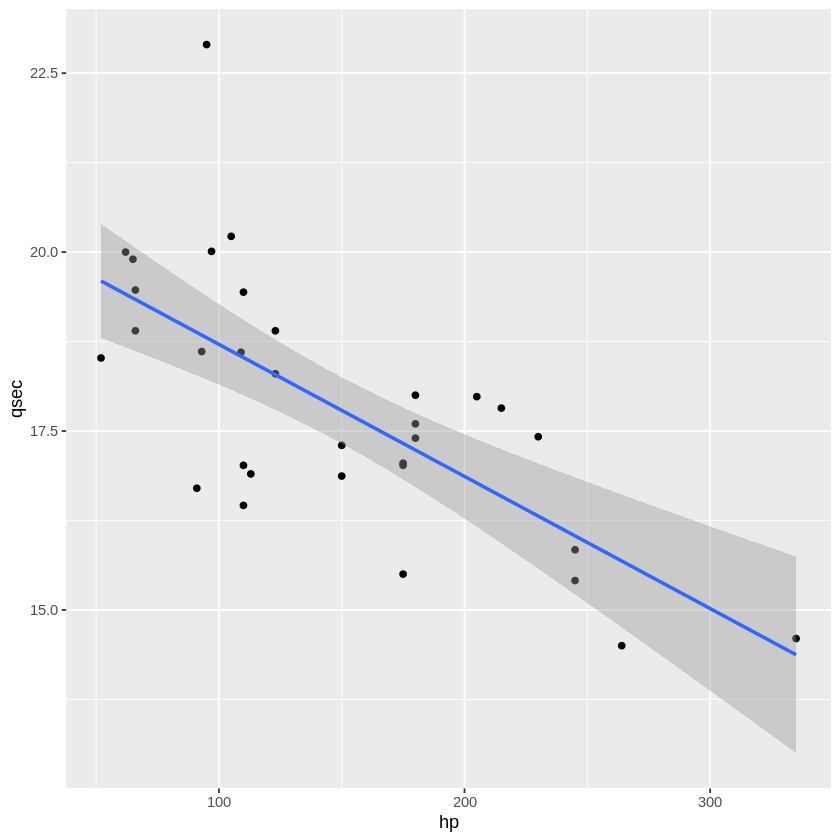

In [119]:
mtcars_tbl %>%
    summarize(hp_qsec_cor=cor(hp,qsec))

mtcars_tbl %>%
    ggplot(aes(x=hp,y=qsec)) +
    geom_point() +
    geom_smooth(method=lm)

## 3.

cyl,wt_lp100km_cor
<dbl>,<dbl>
4,0.7215298
6,0.6926004
8,0.7160829


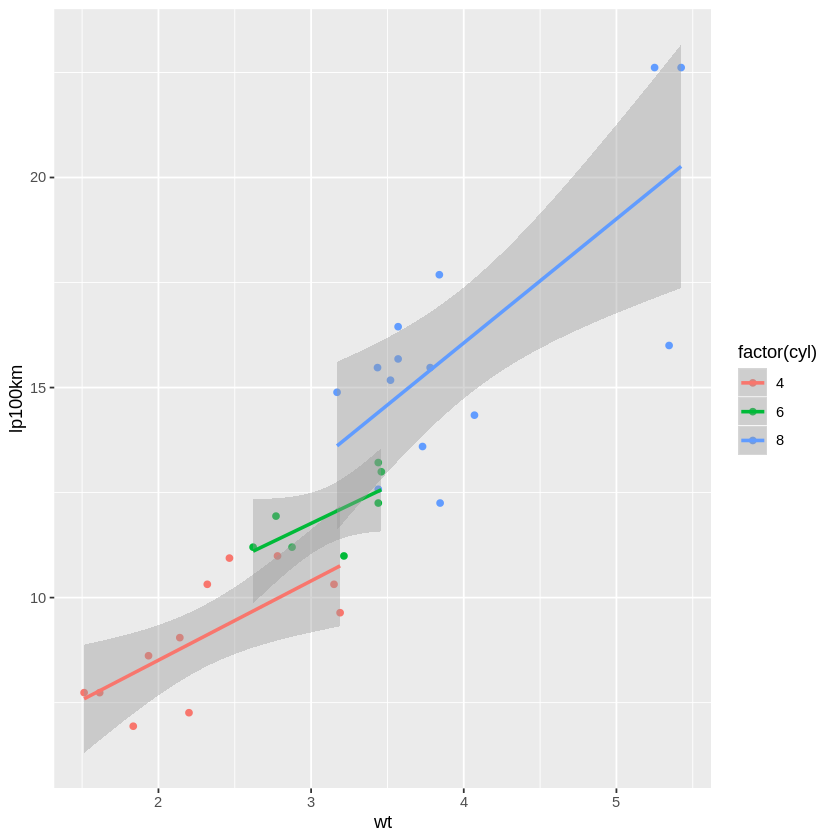

In [120]:
mtcars_grouped_by_cyl <- mtcars_tbl %>%
    group_by(cyl)

mtcars_grouped_by_cyl %>%
    summarize(wt_lp100km_cor=cor(wt,lp100km))

mtcars_grouped_by_cyl %>%
    ggplot(aes(x=wt,y=lp100km,color=factor(cyl))) +
    geom_point() +
    geom_smooth(method=lm)